In [365]:
# Load the first CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()
# Loading the data from the "Full_new" sheet of the excel file:
combined_data = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name='Full_new')

# Display the first few rows of the dataframe
combined_data.head()

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility (6).xlsx


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


DATA PREPROCESSING:


In [366]:
# Check for missing values in merged data
missing_values_combined_data= combined_data.isnull().sum()
missing_values_combined_data



Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [367]:
#Dropping the repeated features

combined_data = combined_data.drop(['Unnamed: 44'], axis=1)
combined_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [368]:
# Impute missing values in 'Marraige Status (Yrs)' with median
combined_data['Marraige Status (Yrs)'].fillna(combined_data['Marraige Status (Yrs)'].median(), inplace=True)

# Impute missing values in 'Fast food (Y/N)' with mode
fast_food_mode = combined_data['Fast food (Y/N)'].mode()[0]
combined_data['Fast food (Y/N)'].fillna(fast_food_mode, inplace=True)

# Check if there are any missing values left
missing_values_combined_data = combined_data.isnull().sum()

missing_values_combined_data

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [369]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [370]:
#to change the data type of two object we see above:

# Identify categorical and numerical columns
categorical_columns = combined_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = combined_data.select_dtypes(exclude=['object']).columns.tolist()

# Exclude target variable 'PCOS (Y/N)' from numerical columns
numerical_columns.remove('PCOS (Y/N)')

categorical_columns

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

In [371]:
combined_data['AMH(ng/mL)'].unique()

array([2.07, 1.53, 6.63, 1.22, 2.26, 6.74, 3.05, 1.54, 1, 1.61, 4.47,
       1.67, 7.94, 2.38, 0.88, 0.69, 3.78, 1.92, 2.85, 2.13, 4.13, 2.5,
       1.89, 0.26, 3.84, 3.56, 1.56, 1.69, 2.34, 1.58, 2.36, 3.64, 2.78,
       0.33, 2.35, 3.88, 3.55, 4.33, 3.66, 4.5, 3.2, 2.1, 6.55, 1.2, 2.33,
       3.22, 2.333, 2.31, 4.2, 3.21, 2.14, 2.3, 4.6, 5.8, 5.2, 4.63, 1.01,
       2.58, 0.35, 5.23, 3.68, 2.55, 4.91, 1.03, 6.56, 3.91, 5.42, 1.65,
       2.06, 1.81, 3.81, 3.65, 8.98, 1.7, 3.18, 2.75, 0.86, 2.29, 2.19,
       8.46, 4.59, 1.04, 4.27, 3.86, 1.42, 10.07, 0.98, 4.07, 3.9, 10,
       16.9, 17, 21.9, 1.6, 3.3, 21, 12.7, 1.8, 3.6, 15, 5, 17.9, 19.8,
       9.2, 2.4, 5.14, 0.3, 11.48, 19.3, 8.8, 19, 4.3, 1.4, 12.6, 4.8,
       17.1, 11.6, 18.4, 9.9, 3.7, 2.9, 2, 4, 15.9, 7.51, 10.04, 6.86,
       7.02, 8.75, 5.27, 9, 3.41, 0.45, 2.53, 0.29, 2.6, 2.83, 2.01, 5.67,
       1.68, 3.63, 3.49, 8, 10.25, 32, 3.38, 1.35, 5.78, 4.66, 1.99, 1.28,
       3.99, 5.69, 7.81, 6.41, 5.76, 6.65, 4.15, 1.86, 

In [372]:
combined_data['II    beta-HCG(mIU/mL)'].unique()

array([1.99, 494.08, 801.45, 100.51, 158.51, 1214.23, 91.55, 749.98,
       218.65, 13, 610.63, 4490.18, 11.24, 15, 768.03, 12, 10, 20, 30.66,
       1455, 497.41, 167, 9.83, 141.06, 528.5, 177.57, 65.03, 173.66,
       161.49, 3.98, 756.61, 255.02, 273.7, 14.46, 145.89, 100.09, 110.17,
       174.37, 75.51, 3893.06, 600.23, 3350.19, 97.63, 14.4, 2, 177.58,
       12.17, 25.3, 100.2, 479.66, 1.9, 586.06, '1.99.', 2.8, 15.36,
       54.08, 152.13, 3.05, 201.36, 16069.69, 57.08, 232.71, 23.5, 180.3,
       102.3, 481.3, 563.8, 4.32, 230.5, 155.3, 3.888, 523.6, 1.65, 3.83,
       569.1, 236.5, 896.6, 2.58, 569.3, 108.66, 3.99, 121.8, 122.58,
       355.28, 122.3, 596.2, 588.7, 147.6, 12.37, 144.63, 475.04, 515.53,
       99.69, 70.42, 342.91, 148.52, 272.78, 355.51, 150.91, 391.46,
       464.12, 41.77, 1390.58, 213.83, 45.9, 18.36, 154.48, 25000, 638.52,
       4.76, 18.13, 89.34, 366.04, 14.34, 75.62, 4.96, 1134.4, 785.95,
       229.86, 3.9, 297.21, 277.28, 783.36, 21084.21, 409.85, 41

In [373]:
#converting all the data in the two columns to object data type for encoding
combined_data['AMH(ng/mL)'].replace('a', 0, inplace=True)
combined_data['AMH(ng/mL)'] = combined_data['AMH(ng/mL)'].astype(float)


# Define a function to clean and convert to float
def clean_and_convert(value):
    try:
        # Attempt to convert to float after stripping trailing period
        return float(str(value).rstrip('.'))
    except ValueError:
        # Handle non-numeric or missing values
        return pd.NaT

# Clean up 'Column3' by applying the custom function
combined_data['II    beta-HCG(mIU/mL)'] = combined_data['II    beta-HCG(mIU/mL)'].apply(clean_and_convert)
combined_data['II    beta-HCG(mIU/mL)']


0        1.99
1        1.99
2      494.08
3        1.99
4      801.45
        ...  
536      1.99
537      1.99
538      1.99
539      1.99
540      1.99
Name: II    beta-HCG(mIU/mL), Length: 541, dtype: float64

In [375]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [376]:
#Renaming the columns where there is extra indentation:
combined_data.rename(columns={' Age (yrs)': 'Age (yrs)'}, inplace=True)
combined_data.rename(columns={'  I   beta-HCG(mIU/mL)': 'I beta-HCG(mIU/mL)'}, inplace=True)
combined_data.rename(columns={'II    beta-HCG(mIU/mL)': 'II beta-HCG(mIU/mL)'}, inplace=True)
combined_data.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)
combined_data.rename(columns={'Pulse rate(bpm) ': 'Pulse rate(bpm)'}, inplace=True)
combined_data.rename(columns={'No. of aborptions': 'No. of abortions'}, inplace=True)

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3   Age (yrs)              541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  541 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [377]:
#this is to test if there are any outliers:
from scipy.stats import zscore

# Assuming 'combined_data' is your dataset
z_scores = zscore(combined_data)

# Define a threshold for identifying outliers (commonly |Z| > 3)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold)

# Check if there are any True values in the outliers array
if outliers.any().any():
    print("There are outliers in the dataset.")
else:
    print("No outliers found in the dataset.")

There are outliers in the dataset.


In [378]:
# Check if there are any True values in the outliers array for each column
for column in combined_data.columns:
    if outliers[column].any():
        print(f"Column '{column}' has outliers.")

Column 'Age (yrs)' has outliers.
Column 'Weight (Kg)' has outliers.
Column 'Height(Cm)' has outliers.
Column 'BMI' has outliers.
Column 'Pulse rate(bpm)' has outliers.
Column 'RR (breaths/min)' has outliers.
Column 'Hb(g/dl)' has outliers.
Column 'Cycle length(days)' has outliers.
Column 'Marraige Status (Yrs)' has outliers.
Column 'No. of abortions' has outliers.
Column 'I beta-HCG(mIU/mL)' has outliers.
Column 'II beta-HCG(mIU/mL)' has outliers.
Column 'FSH(mIU/mL)' has outliers.
Column 'LH(mIU/mL)' has outliers.
Column 'FSH/LH' has outliers.
Column 'Hip(inch)' has outliers.
Column 'Waist(inch)' has outliers.
Column 'TSH (mIU/L)' has outliers.
Column 'AMH(ng/mL)' has outliers.
Column 'PRL(ng/mL)' has outliers.
Column 'Vit D3 (ng/mL)' has outliers.
Column 'PRG(ng/mL)' has outliers.
Column 'RBS(mg/dl)' has outliers.
Column 'BP _Systolic (mmHg)' has outliers.
Column 'BP _Diastolic (mmHg)' has outliers.
Column 'Follicle No. (L)' has outliers.
Column 'Follicle No. (R)' has outliers.
Colum

In [379]:
# Display the 'Age (yrs)' column for the subset of data containing outliers
combined_data[outliers['Age (yrs)']==True]['Age (yrs)']


474    48
Name: Age (yrs), dtype: int64

In [380]:
# Display the 'Weight (Kg)' column for the subset of data containing outliers
combined_data[outliers['Weight (Kg)']==True]['Weight (Kg)']

79     108.0
244    104.0
477     94.0
Name: Weight (Kg), dtype: float64

In [381]:
# Display the 'Height(Cm) ' column for the subset of data containing outliers
combined_data[outliers['Height(Cm)']==True]['Height(Cm)']

59     137.0
105    180.0
Name: Height(Cm), dtype: float64

In [382]:
# Display the 'BMI' column for the subset of data containing outliers
combined_data[outliers['BMI']==True]['BMI']

79     38.265306
97     38.539383
244    38.479526
477    38.900000
Name: BMI, dtype: float64

In [383]:
# Display the 'Pulse rate(bpm)' column for the subset of data containing outliers
combined_data[outliers['Pulse rate(bpm)']==True]['Pulse rate(bpm)']

223    18
296    13
Name: Pulse rate(bpm), dtype: int64

Since the outliers are significant, we will take the mean of values in the mentioned column to replace these values.


In [384]:
#Replacing the outliers
# Step 1: Calculate the mean of the 'Pulse rate(bpm)' column
mean_pulse_rate = combined_data['Pulse rate(bpm)'].mean()

# Step 2: Replace outlier values in rows 223 and 296 with the mean
combined_data.loc[combined_data.index.isin([223, 296]), 'Pulse rate(bpm)'] = mean_pulse_rate

# Display the updated 'Pulse rate(bpm)' column for the subset of data
print(combined_data.loc[outliers['Pulse rate(bpm)'], ['Pulse rate(bpm)']])


     Pulse rate(bpm)
223        73.247689
296        73.247689


In [385]:
# Display the 'RR (breaths/min)' column for the subset of data containing outliers
combined_data[outliers['RR (breaths/min)']==True]['RR (breaths/min)']

5      28
165    26
324    28
Name: RR (breaths/min), dtype: int64

In [386]:
# Display the 'Hb(g/dl)' column for the subset of data containing outliers
combined_data[outliers['Hb(g/dl)']==True]['Hb(g/dl)']

67      8.5
181    13.8
193    13.8
249    14.2
260    14.8
319    13.8
337    14.0
509    14.0
Name: Hb(g/dl), dtype: float64

In [387]:
#Cycle length(days)
combined_data[outliers['Cycle length(days)']==True]['Cycle length(days)']

39      0
50     10
74     12
76     11
92     11
97     12
101    11
109    11
142    11
Name: Cycle length(days), dtype: int64

Since the outliers in 39th row is significant, we will take the mean of values in the mentioned column to replace these value.


In [388]:
#Replacing the outlier in 'Cycle length(days)' column
# Step 1: Calculate the mean of the 'Cycle length(days)' column
mean_cycle_length = combined_data['Cycle length(days)'].mean()

# Step 2: Replace the outlier value (0) in row 39 with the mean
combined_data.loc[39, 'Cycle length(days)'] = mean_cycle_length

# Display the updated 'Cycle length(days)' column for the subset of data
print(combined_data.loc[outliers['Cycle length(days)'], ['Cycle length(days)']])


     Cycle length(days)
39              4.94085
50             10.00000
74             12.00000
76             11.00000
92             11.00000
97             12.00000
101            11.00000
109            11.00000
142            11.00000


In [389]:
#Marraige Status (Yrs)
combined_data[outliers['Marraige Status (Yrs)']==True]['Marraige Status (Yrs)']

252    30.0
272    25.0
318    24.0
326    23.0
408    23.0
447    30.0
474    25.0
Name: Marraige Status (Yrs), dtype: float64

In [390]:
#No. of abortions
combined_data[outliers['No. of abortions']==True]['No. of abortions']

33     3
66     3
79     3
96     3
99     5
129    4
161    3
182    3
214    4
220    3
229    3
326    3
487    3
Name: No. of abortions, dtype: int64

In [391]:
#I beta-HCG(mIU/mL)
combined_data[outliers['I beta-HCG(mIU/mL)']==True]['I beta-HCG(mIU/mL)']

110    26290.26
111    32460.97
138    21977.29
214    25000.00
252    25000.00
315    21084.21
317    17243.97
446    30004.00
447    30007.00
Name: I beta-HCG(mIU/mL), dtype: float64

In [392]:
#II beta-HCG(mIU/mL)
combined_data[outliers['II beta-HCG(mIU/mL)']==True]['II beta-HCG(mIU/mL)']

138    16069.69
252    25000.00
315    21084.21
Name: II beta-HCG(mIU/mL), dtype: float64

In [393]:
#FSH(mIU/mL)
combined_data[outliers['FSH(mIU/mL)']==True]['FSH(mIU/mL)']

329    5052.0
Name: FSH(mIU/mL), dtype: float64

In [394]:
#Hip(inch)
combined_data[outliers['Hip(inch)']==True]['Hip(inch)']

457    26
520    26
525    26
Name: Hip(inch), dtype: int64

In [395]:
#Waist(inch)
combined_data[outliers['Waist(inch)']==True]['Waist(inch)']

477    47
521    46
540    46
Name: Waist(inch), dtype: int64

In [396]:
#TSH (mIU/L)
combined_data[outliers['TSH (mIU/L)']==True]['TSH (mIU/L)']

3      16.41
37     65.00
128    15.68
168    16.99
233    25.91
278    22.59
305    16.00
346    20.85
535    17.20
Name: TSH (mIU/L), dtype: float64

In [397]:
#AMH(ng/mL)
combined_data[outliers['AMH(ng/mL)']==True]['AMH(ng/mL)']

180    32.0
213    26.4
267    66.0
268    26.8
402    28.6
445    26.4
Name: AMH(ng/mL), dtype: float64

In [398]:
#PRL(ng/mL)
combined_data[outliers['PRL(ng/mL)']==True]['PRL(ng/mL)']

15      92.65
149     77.32
248    111.74
274    128.24
284     96.63
374     99.93
393     99.93
424     71.77
538     96.41
Name: PRL(ng/mL), dtype: float64

In [399]:
#Vit D3 (ng/mL)
combined_data[outliers['Vit D3 (ng/mL)']==True]['Vit D3 (ng/mL)']

191    6014.66
195    5418.60
Name: Vit D3 (ng/mL), dtype: float64

In [400]:
#RBS(mg/dl)
combined_data[outliers['RBS(mg/dl)']==True]['RBS(mg/dl)']

146    160.0
178    350.0
230    160.0
432    225.0
Name: RBS(mg/dl), dtype: float64

In [401]:
#BP _Systolic (mmHg)
combined_data[outliers['BP _Systolic (mmHg)']==True]['BP _Systolic (mmHg)']

161     12
179    140
365    140
Name: BP _Systolic (mmHg), dtype: int64

Since the outlier in 161th row is significant, we will take the mean of values in the mentioned column to replace these value.

In [402]:
# Step 1: Calculate the mean of the 'BP _Systolic (mmHg)' column
mean_systolic_bp = combined_data['BP _Systolic (mmHg)'].mean()

# Step 2: Replace the outlier value (12) in row 161 with the mean
combined_data.loc[161, 'BP _Systolic (mmHg)'] = mean_systolic_bp

# Display the updated 'BP _Systolic (mmHg)' column for the subset of data
print(combined_data.loc[outliers['BP _Systolic (mmHg)'], ['BP _Systolic (mmHg)']])

     BP _Systolic (mmHg)
161           114.661738
179           140.000000
365           140.000000


In [403]:
#BP _Diastolic (mmHg)
combined_data[outliers['BP _Diastolic (mmHg)']==True]['BP _Diastolic (mmHg)']

165     60
200      8
365    100
Name: BP _Diastolic (mmHg), dtype: int64

Since the outlier in 200th row is significant, we will take the mean of values in the mentioned column to replace these value.

In [404]:
# Step 1: Calculate the mean of the 'BP _Diastolic (mmHg)' column
mean_diastolic_bp = combined_data['BP _Diastolic (mmHg)'].mean()

# Step 2: Replace the outlier value (8) in row 200 with the mean
combined_data.loc[200, 'BP _Diastolic (mmHg)'] = mean_diastolic_bp

# Display the updated 'BP _Diastolic (mmHg)' column for the subset of data
print(combined_data.loc[outliers['BP _Diastolic (mmHg)'], ['BP _Diastolic (mmHg)']])

     BP _Diastolic (mmHg)
165             60.000000
200             76.927911
365            100.000000


In [405]:
#Follicle No. (L)
combined_data[outliers['Follicle No. (L)']==True]['Follicle No. (L)']

26     21
50     22
117    21
450    20
464    21
509    20
Name: Follicle No. (L), dtype: int64

In [406]:
#Follicle No. (R)
combined_data[outliers['Follicle No. (R)']==True]['Follicle No. (R)']

26     20
117    20
169    20
294    20
320    20
520    20
Name: Follicle No. (R), dtype: int64

In [407]:
#Avg. F size (L) (mm)
combined_data[outliers['Avg. F size (L) (mm)']==True]['Avg. F size (L) (mm)']

18     0.0
42     0.0
75     0.0
78     0.0
143    0.0
146    0.0
411    2.0
461    0.0
Name: Avg. F size (L) (mm), dtype: float64

In [408]:
#Avg. F size (R) (mm)
combined_data[outliers['Avg. F size (R) (mm)']==True]['Avg. F size (R) (mm)']

67     5.00
70     4.70
72     4.50
103    0.00
425    0.17
Name: Avg. F size (R) (mm), dtype: float64

EXPLORATORY DATA ANALYSIS:

In [409]:
#Having a look at the summary statistics:

summary_combined_data = combined_data.describe(include='all')
summary_combined_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.461174,19.243993,...,0.489834,0.515712,0.247689,114.85150,77.055320,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,2.684683,1.688629,...,0.500359,0.500216,0.432070,5.91423,4.717648,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,70.000000,16.000000,...,0.000000,0.000000,0.000000,100.00000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.00000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.00000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.00000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.00000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


<Axes: >

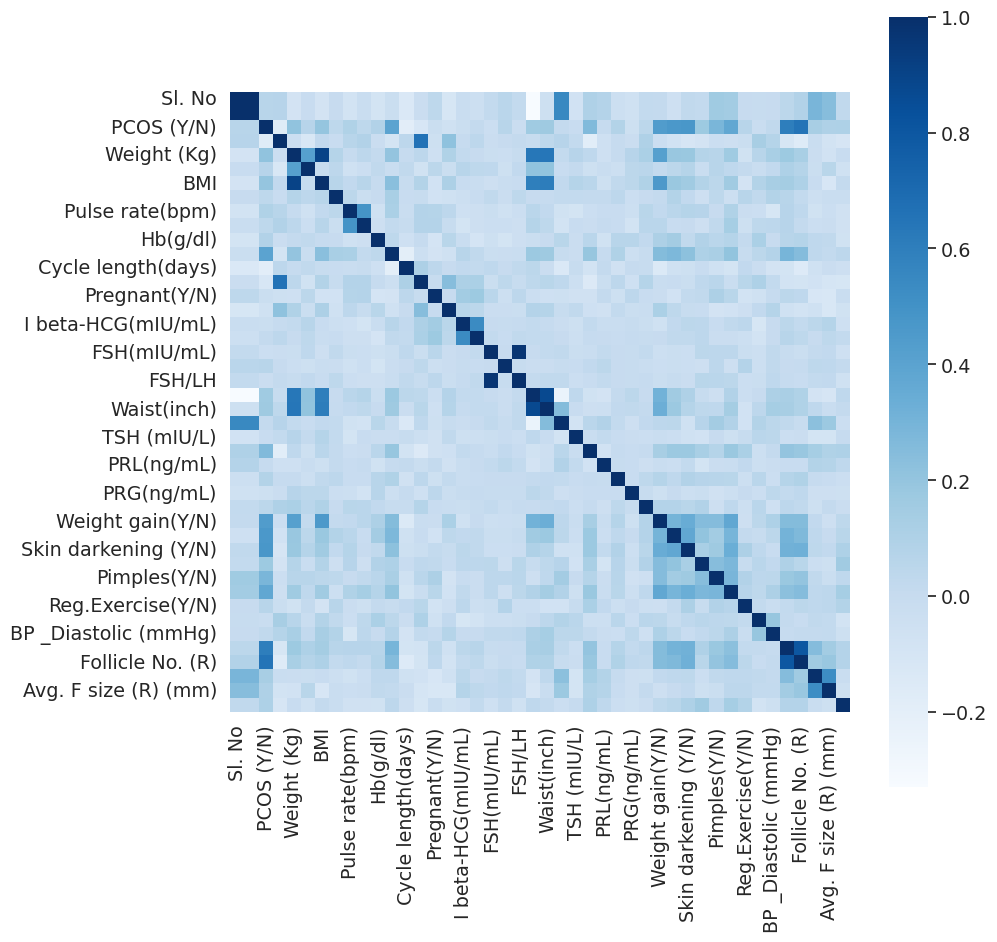

In [410]:
#Examaning a correlation matrix of all the features
import seaborn as sns

correlation_matrix = combined_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap="Blues", square=True)

In [411]:
#How all the features correlate with the PCOS

correlation_matrix["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)               1.000000
Follicle No. (R)         0.648327
Follicle No. (L)         0.603346
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.376183
Pimples(Y/N)             0.286077
AMH(ng/mL)               0.264755
Weight (Kg)              0.211938
BMI                      0.199534
Hair loss(Y/N)           0.172879
Waist(inch)              0.164598
Hip(inch)                0.162297
Avg. F size (L) (mm)     0.132992
Endometrium (mm)         0.106648
Avg. F size (R) (mm)     0.097690
Pulse rate(bpm)          0.096021
Hb(g/dl)                 0.087170
Vit D3 (ng/mL)           0.085494
Height(Cm)               0.068254
Reg.Exercise(Y/N)        0.065337
LH(mIU/mL)               0.063879
Sl. No                   0.060998
Patient File No.         0.060998
RBS(mg/dl)               0.048922
RR (breaths/min)         0.036928
Blood Group              0.036433
BP _Diastolic 

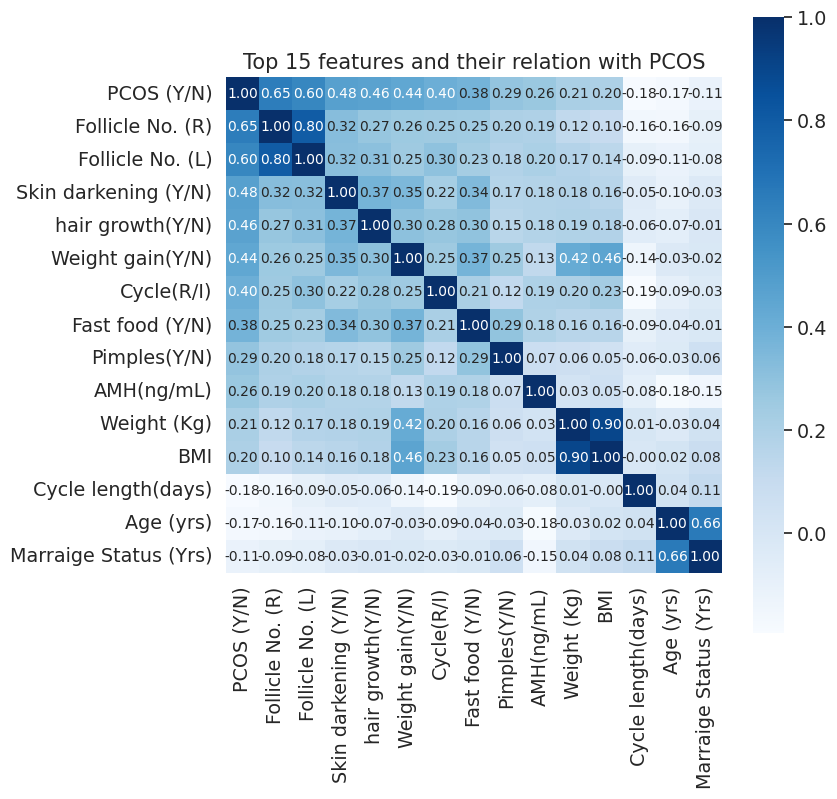

In [412]:
# Top 15 features and their relation with PCOS

plt.figure(figsize=(8, 8))
k = 12  # Number of variables with positive correlation for heatmap
l = 3   # Number of variables with negative correlation for heatmap

# Extract top positively correlated features and bottom negatively correlated features
cols_p = correlation_matrix.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = correlation_matrix.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

# Create a subset of the data with selected features
subset_data = combined_data[cols]

# Compute the correlation matrix for the selected features
cm = subset_data.corr()

# Plot the heatmap
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap="Blues", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.title('Top 15 features and their relation with PCOS')
plt.show()


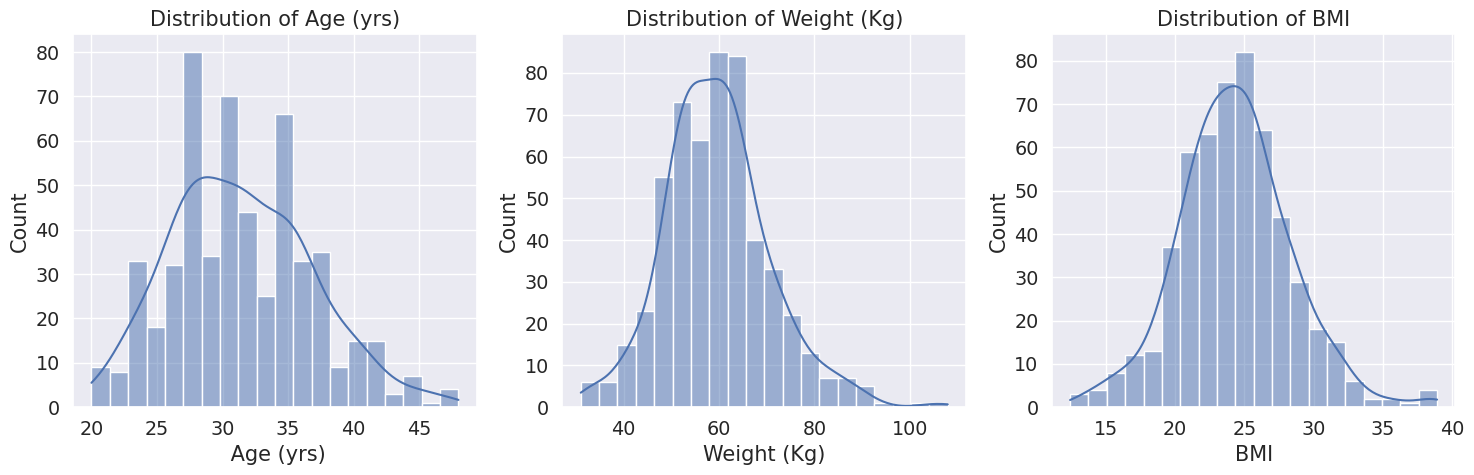

In [413]:
import matplotlib.pyplot as plt

# Plot histograms for Age, Weight, Weight Gain, BMI
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(combined_data['Age (yrs)'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age (yrs)')
axes[0].set_xlabel(' Age (yrs)')

sns.histplot(combined_data['Weight (Kg)'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Weight (Kg)')
axes[1].set_xlabel('Weight (Kg)')

sns.histplot(combined_data['BMI'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of BMI')
axes[2].set_xlabel('BMI')


plt.tight_layout()
plt.show()


Observations:

Age (yrs): The majority of patients are between 25 and 35 years of age.

Weight (Kg): The weight distribution is somewhat right-skewed, with most patients weighing between 50 and 70 kg.

BMI: The BMI distribution is approximately normal, centering around 25.




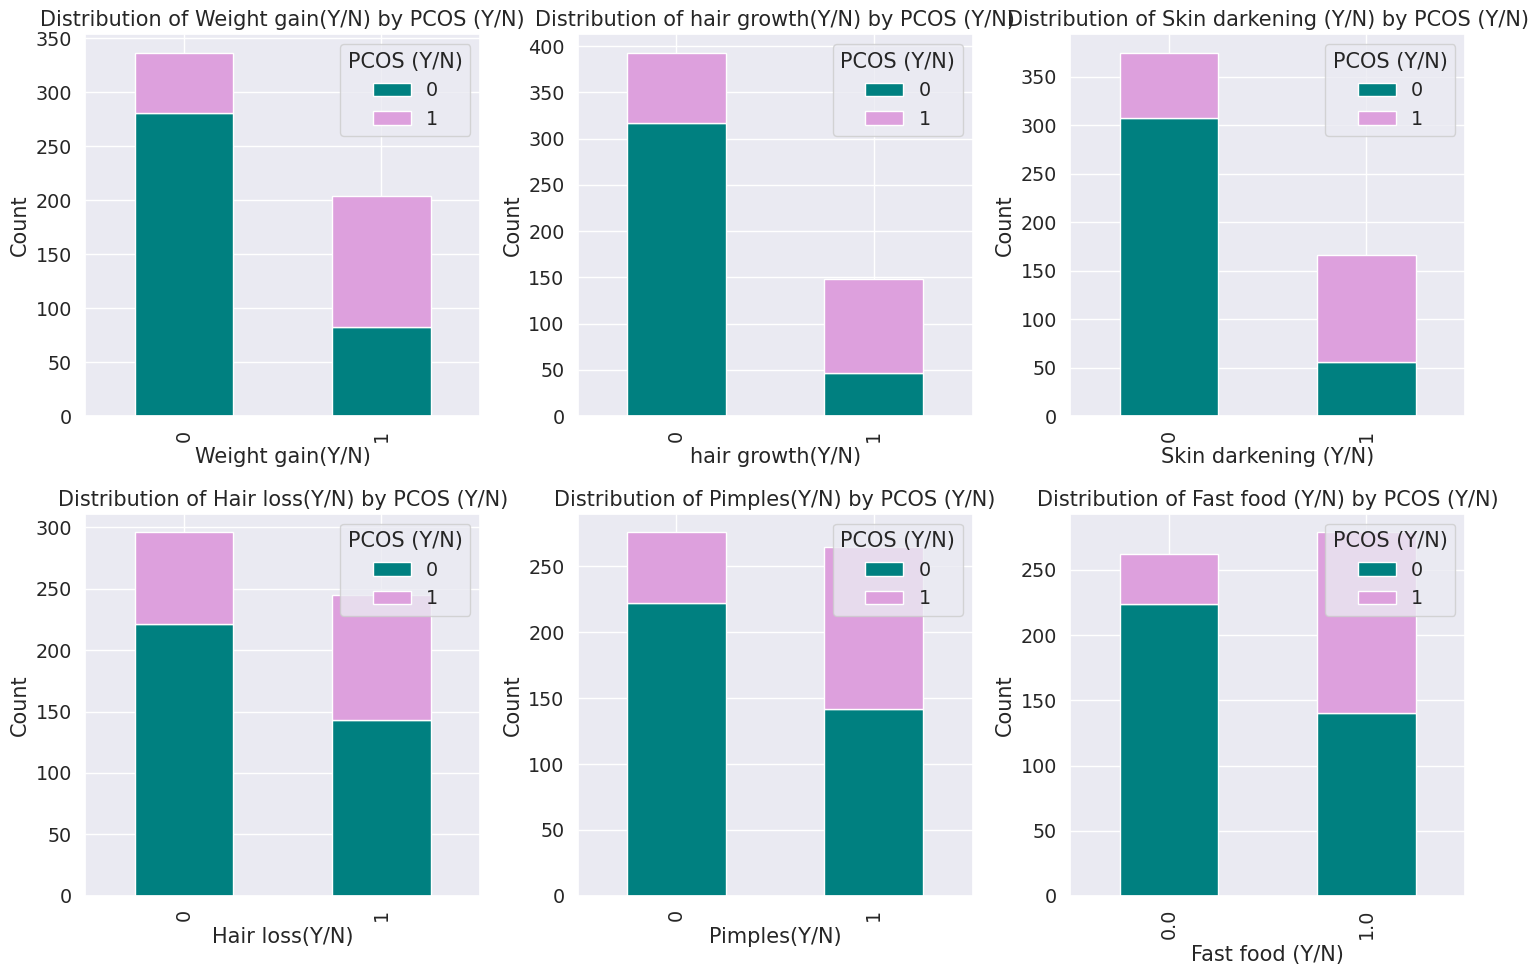

In [414]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    pd.crosstab(combined_data[feature], combined_data['PCOS (Y/N)']).plot(kind='bar', stacked=True, color=['teal', 'plum'], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by PCOS (Y/N)')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


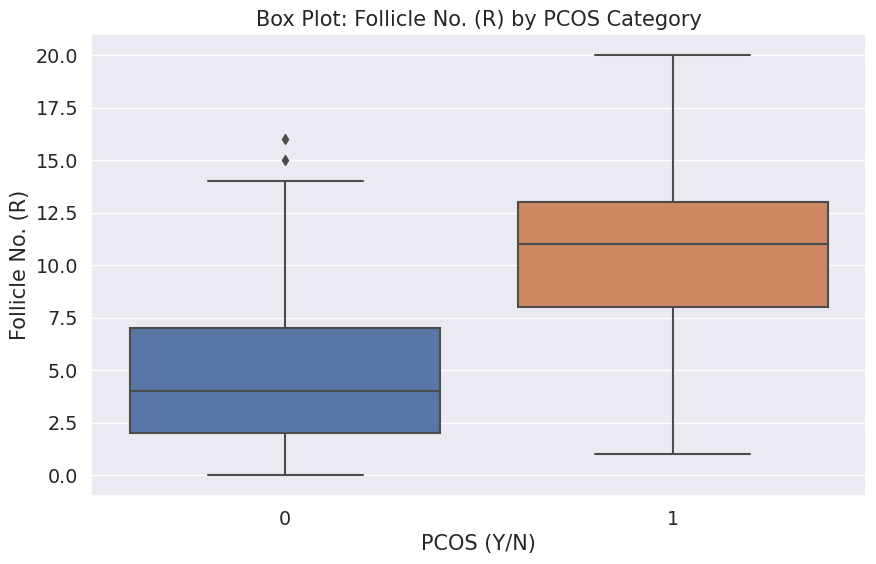

In [416]:

plt.figure(figsize=(10, 6))

# Box plot for Follicle No. (R) by PCOS category
sns.boxplot(x='PCOS (Y/N)', y='Follicle No. (R)', data=combined_data)
plt.title('Box Plot: Follicle No. (R) by PCOS Category')
plt.xlabel('PCOS (Y/N)')
plt.ylabel('Follicle No. (R)')

plt.show()


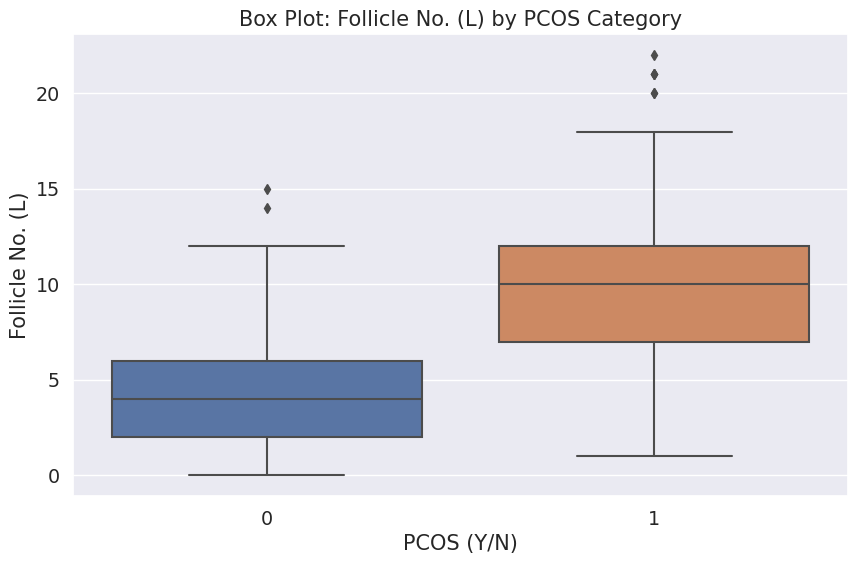

In [417]:
plt.figure(figsize=(10, 6))

# Box plot for Follicle No. (L) by PCOS category
sns.boxplot(x='PCOS (Y/N)', y='Follicle No. (L)', data=combined_data)
plt.title('Box Plot: Follicle No. (L) by PCOS Category')
plt.xlabel('PCOS (Y/N)')
plt.ylabel('Follicle No. (L)')

plt.show()

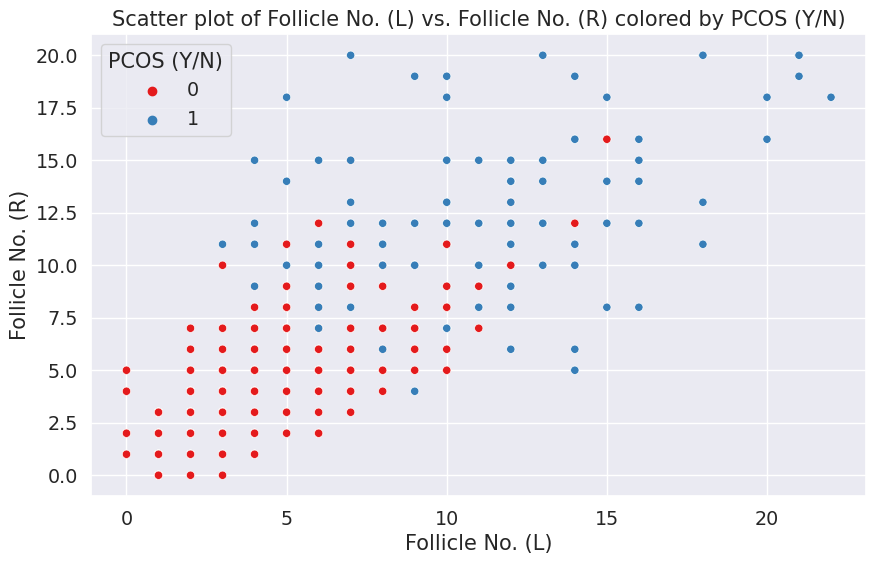

In [415]:

# Scatter plot of No. of follicle in left ovary vs right ovary colored by PCOS (Y/N)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Follicle No. (L)', y='Follicle No. (R)', hue='PCOS (Y/N)', data=combined_data, palette='Set1')
plt.title('Scatter plot of Follicle No. (L) vs. Follicle No. (R) colored by PCOS (Y/N)')
plt.xlabel('Follicle No. (L)')
plt.ylabel('Follicle No. (R)')
plt.legend(title='PCOS (Y/N)')
plt.show()


STATISTICAL TESTING


In [418]:

from scipy import stats

# Select predictors to test
predictors = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)']

# Chi-square test
for predictor in predictors:
    contigency_table = pd.crosstab([predictor], ['PCOS (Y/N)'])
    chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

    print(f'Predictor: {predictor}')
    print(f'Chi-squared = {round(chi2,3)}, p-value = {round(p,3)}')

    if p < 0.05:
        print("Reject H0 - significant association found between "+
              predictor + " and PCOS")
    else:
        print("Fail to reject H0 - no significant association found")

    print('\n')

Predictor: Weight gain(Y/N)
Chi-squared = 0.0, p-value = 1.0
Fail to reject H0 - no significant association found


Predictor: hair growth(Y/N)
Chi-squared = 0.0, p-value = 1.0
Fail to reject H0 - no significant association found


Predictor: Skin darkening (Y/N)
Chi-squared = 0.0, p-value = 1.0
Fail to reject H0 - no significant association found


Predictor: Hair loss(Y/N)
Chi-squared = 0.0, p-value = 1.0
Fail to reject H0 - no significant association found


Predictor: Pimples(Y/N)
Chi-squared = 0.0, p-value = 1.0
Fail to reject H0 - no significant association found


Predictor: Fast food (Y/N)
Chi-squared = 0.0, p-value = 1.0
Fail to reject H0 - no significant association found




In [419]:
import pandas as pd
from scipy import stats

df = combined_data

# T-test
l_follicles = df['Follicle No. (L)']
r_follicles = df['Follicle No. (R)']

tstat, pval = stats.ttest_ind(l_follicles, r_follicles)

print(f't-statistic: {round(tstat, 3)}, p-value: {round(pval, 3)}')



t-statistic: -1.943, p-value: 0.052


In [420]:
from scipy.stats import ttest_rel

# T test
t_stat, p_value = ttest_rel(combined_data['Follicle No. (L)'], combined_data['Follicle No. (R)'])
print("T-statistic value:", t_stat)
print("P-Value:", p_value)


T-statistic value: -4.3298499700811774
P-Value: 1.7788751047263863e-05


MODEL BUILDING

In [421]:
# Split data into features and target variable
X = combined_data.drop(columns=['PCOS (Y/N)'])
y = combined_data['PCOS (Y/N)']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)


In [422]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [423]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [424]:
#Making the Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = log_classifier.predict(X_test)
Log_cm = confusion_matrix(y_test, y_pred)
print(Log_cm)
accuracy_score(y_test, y_pred)

[[83  9]
 [12 32]]


0.8455882352941176

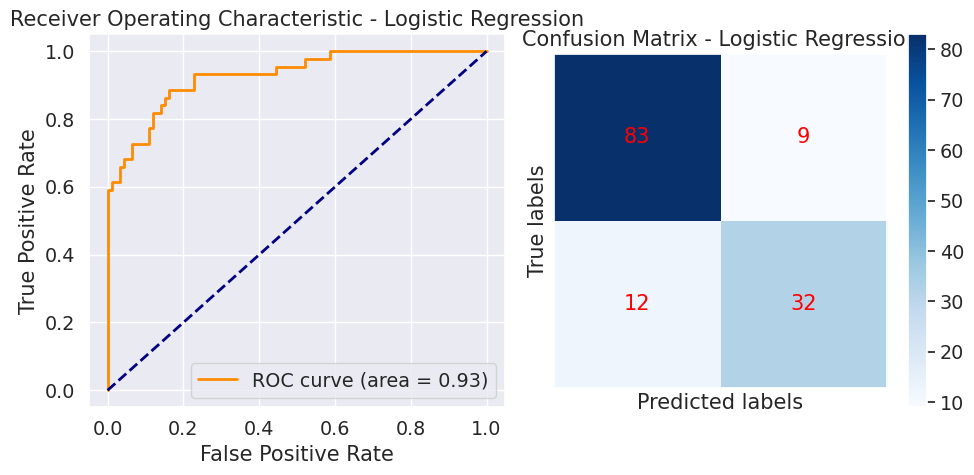

(0.9042145593869733, 0.7529411764705882)

In [425]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Function to calculate metrics and plot ROC and confusion matrix using alternative methods
def evaluate_model_alternative(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilities
    y_prob_test = model.predict_proba(X_test)[:, 1]

    # F1 Score
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Plot ROC curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(model_name))
    plt.legend(loc='lower right')

    # Plot Confusion Matrix
    plt.subplot(1, 2, 2)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title('Confusion Matrix - {}'.format(model_name))
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

    plt.tight_layout()
    plt.show()

    return f1_train, f1_test

    # Logistic Regression
f1_train_log_reg, f1_test_log_reg = evaluate_model_alternative(log_classifier, X_train, y_train, X_test, y_test, 'Logistic Regression')




f1_train_log_reg, f1_test_log_reg

In [426]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [427]:
#making confusion matrix for Decision Tree Classifier
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = DT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[73 19]
 [10 34]]


0.7867647058823529

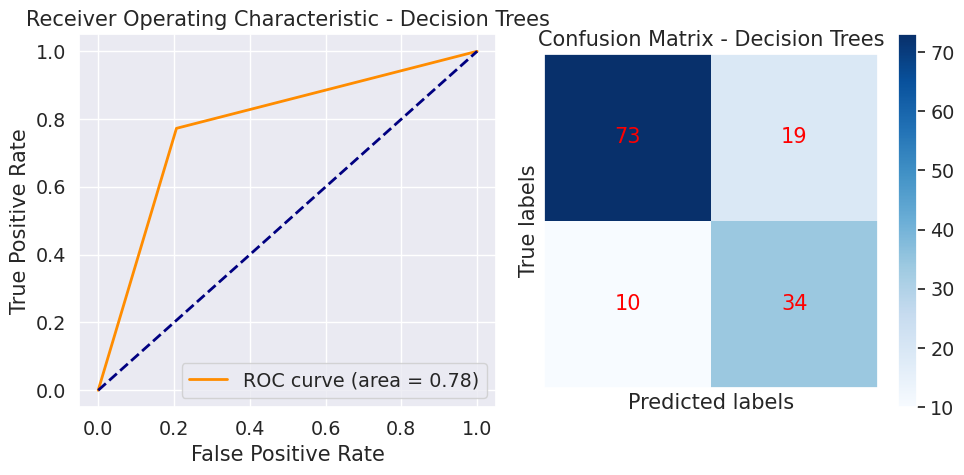

(1.0, 0.7010309278350515)

In [428]:
# Evaluate Decision Trees using alternative methods
f1_train_decision_tree, f1_test_decision_tree = evaluate_model_alternative(DT_classifier, X_train, y_train, X_test, y_test, 'Decision Trees')

f1_train_decision_tree, f1_test_decision_tree

In [429]:
#Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 4)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=4)

In [430]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88  4]
 [11 33]]


0.8897058823529411

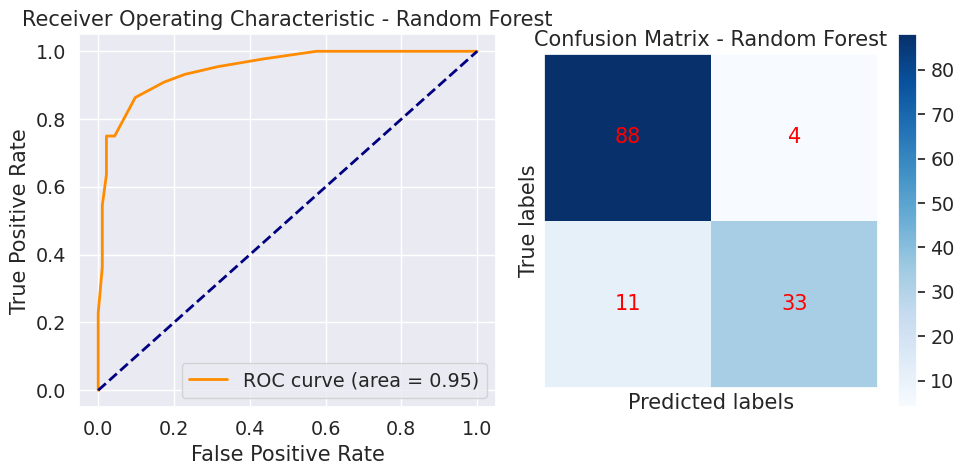

(0.9962546816479401, 0.8148148148148148)

In [431]:
f1_train_random_forest, f1_test_random_forest = evaluate_model_alternative(RF_classifier, X_train, y_train, X_test, y_test, 'Random Forest')
f1_train_random_forest, f1_test_random_forest

In [435]:
from xgboost import XGBClassifier

# Initialize the model
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',max_depth=5)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

accuracy_train_xgb, accuracy_test_xgb

(1.0, 0.9117647058823529)

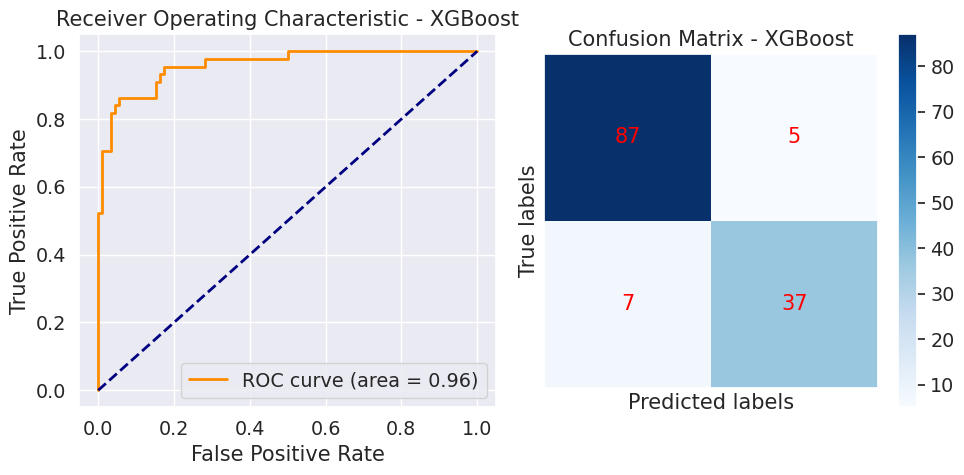

In [436]:
# Initialize and train the XGBoost model
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss', max_depth=5)
xgb.fit(X_train, y_train)

# Evaluate XGBoost using the alternative method
f1_train_xgb, f1_test_xgb = evaluate_model_alternative(xgb, X_train, y_train, X_test, y_test, 'XGBoost')